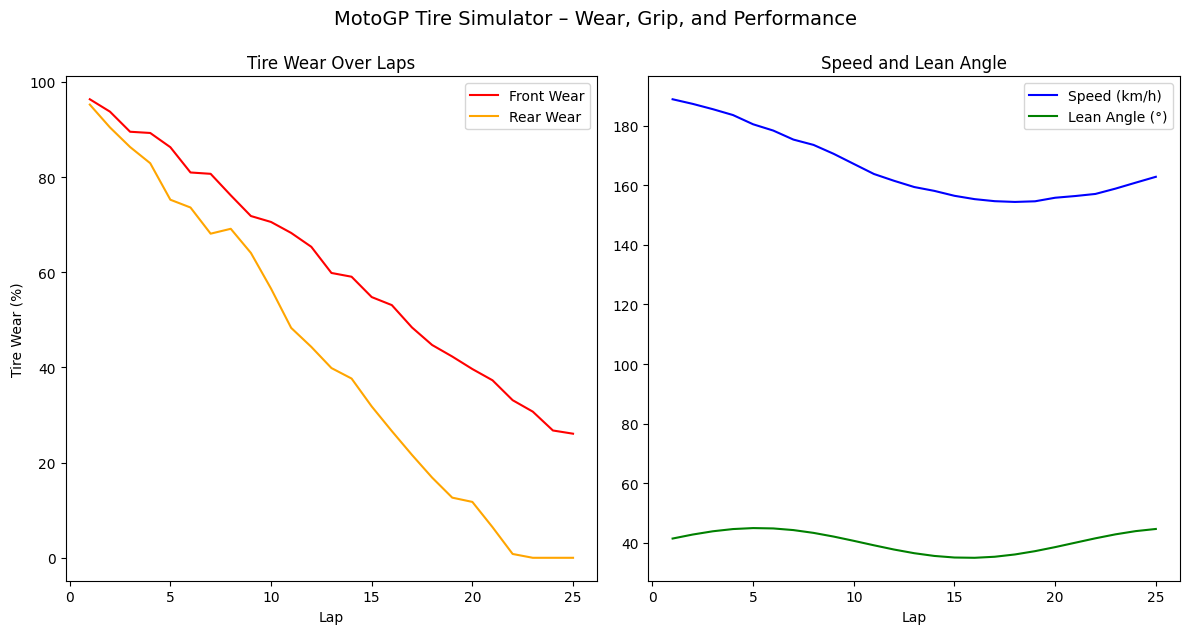

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulate 25 race laps
laps = np.arange(1, 26)

# Simulated values
front_temp = 80 + 0.8 * laps + np.random.normal(0, 2, size=25)  # °C
rear_temp = 85 + 1.2 * laps + np.random.normal(0, 2.5, size=25)

front_wear = np.clip(1.0 - 0.03 * laps + np.random.normal(0, 0.01, size=25), 0, 1)  # 1 = new, 0 = worn
rear_wear = np.clip(1.0 - 0.045 * laps + np.random.normal(0, 0.015, size=25), 0, 1)

lean_angle_deg = 40 + 5 * np.sin(0.3 * laps)  # simulate track variation
bike_speed_kmh = 180 + 10 * np.cos(0.2 * laps) - 20 * (1 - rear_wear)  # speed drops with wear

# Grip loss modeled as inverse function of wear + temp
front_grip_loss = 1 - front_wear * (100 / (front_temp + 1))
rear_grip_loss = 1 - rear_wear * (100 / (rear_temp + 1))

# Create DataFrame
df8 = pd.DataFrame({
    "Lap": laps,
    "Front Temp (°C)": front_temp,
    "Rear Temp (°C)": rear_temp,
    "Front Wear (%)": front_wear * 100,
    "Rear Wear (%)": rear_wear * 100,
    "Lean Angle (°)": lean_angle_deg,
    "Speed (km/h)": bike_speed_kmh,
    "Front Grip Loss": front_grip_loss,
    "Rear Grip Loss": rear_grip_loss
})

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(laps, front_wear * 100, label="Front Wear", color='red')
plt.plot(laps, rear_wear * 100, label="Rear Wear", color='orange')
plt.xlabel("Lap")
plt.ylabel("Tire Wear (%)")
plt.title("Tire Wear Over Laps")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(laps, bike_speed_kmh, label="Speed (km/h)", color='blue')
plt.plot(laps, lean_angle_deg, label="Lean Angle (°)", color='green')
plt.xlabel("Lap")
plt.title("Speed and Lean Angle")
plt.legend()

plt.tight_layout()
plt.suptitle("MotoGP Tire Simulator – Wear, Grip, and Performance", fontsize=14, y=1.05)
plt.show()